In [1]:
# Import the necessary libraries
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

In [2]:
# Upload the image file
uploaded = files.upload()

Saving doraemon.jpg to doraemon.jpg


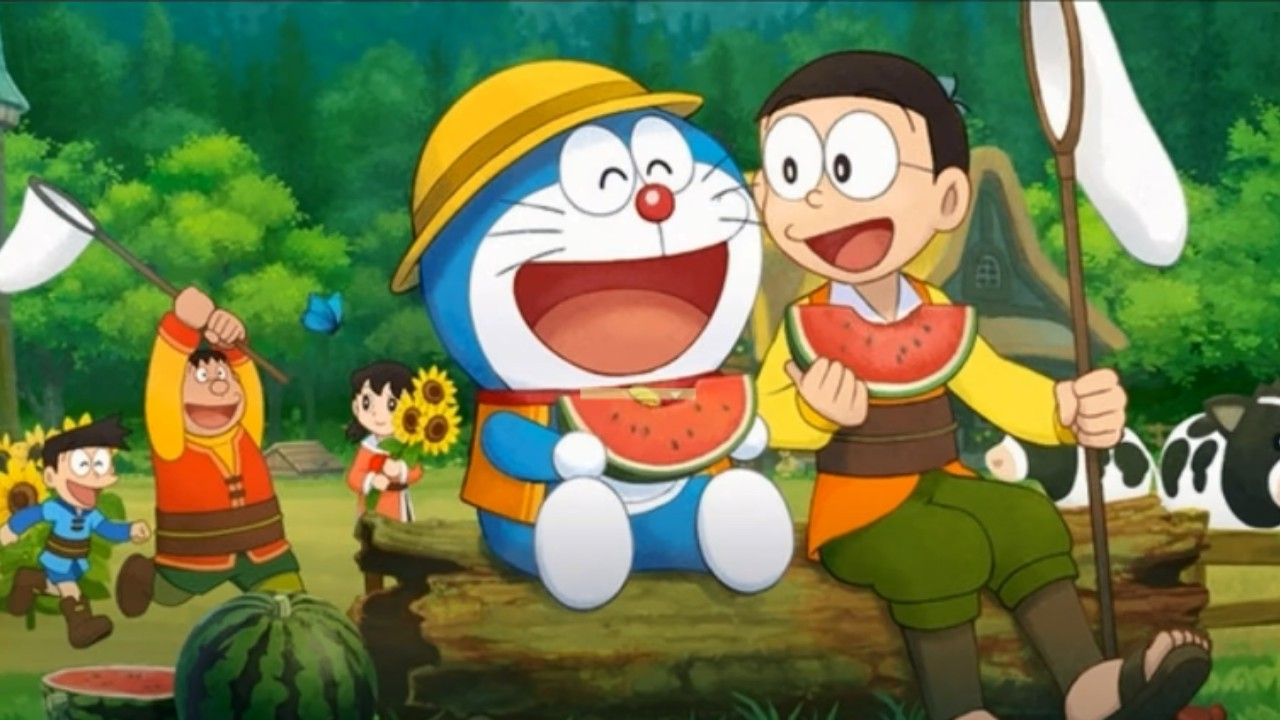

In [5]:
# Load the image and convert it to grayscale
image = cv2.imread(list(uploaded.keys())[0])
cv2_imshow(image)


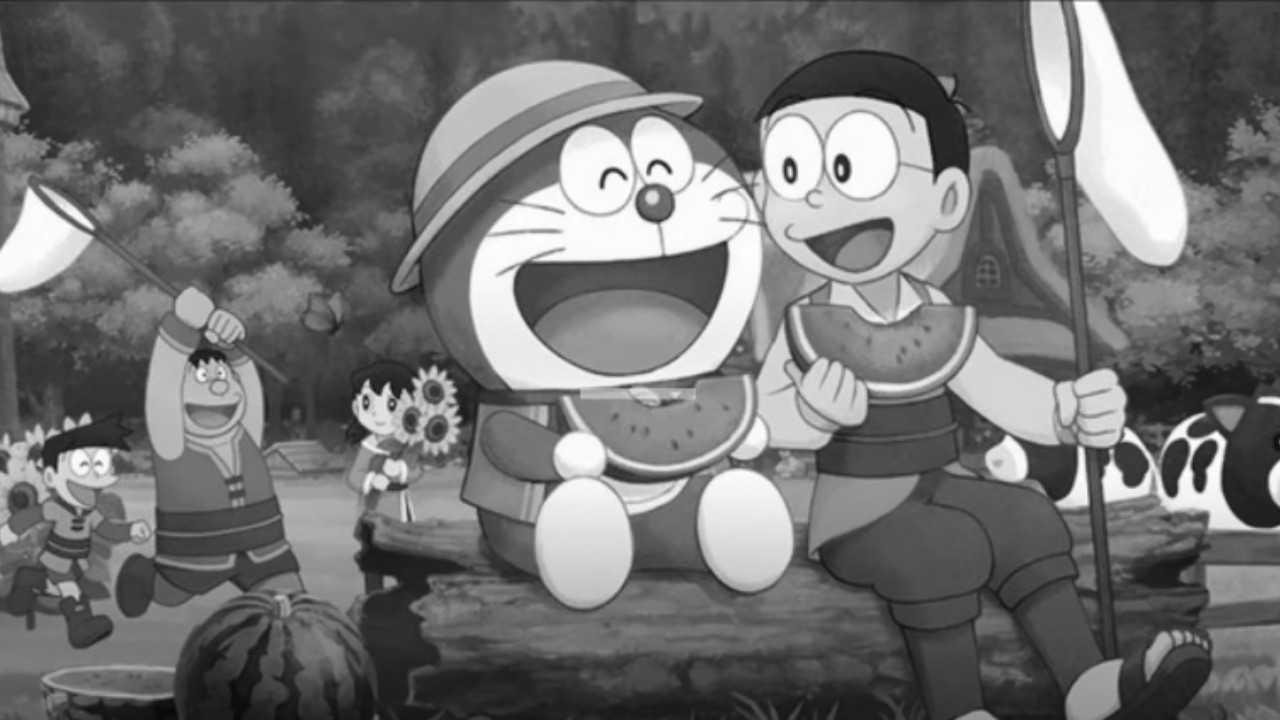

In [6]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

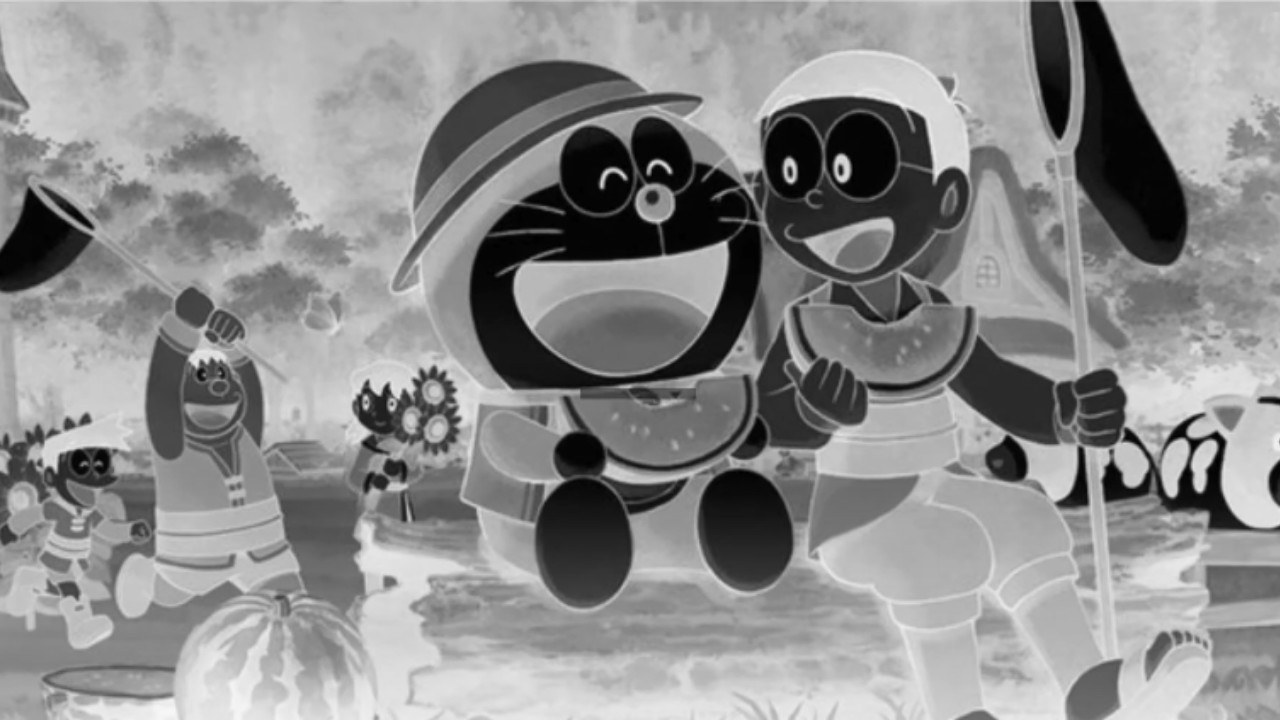

In [7]:
# Invert the grayscale image
inverted_image = 255 - gray_image
cv2_imshow(inverted_image)

In [8]:
# Blur the inverted image using GaussianBlur
blurred_image = cv2.GaussianBlur(inverted_image, (21, 21), 0)

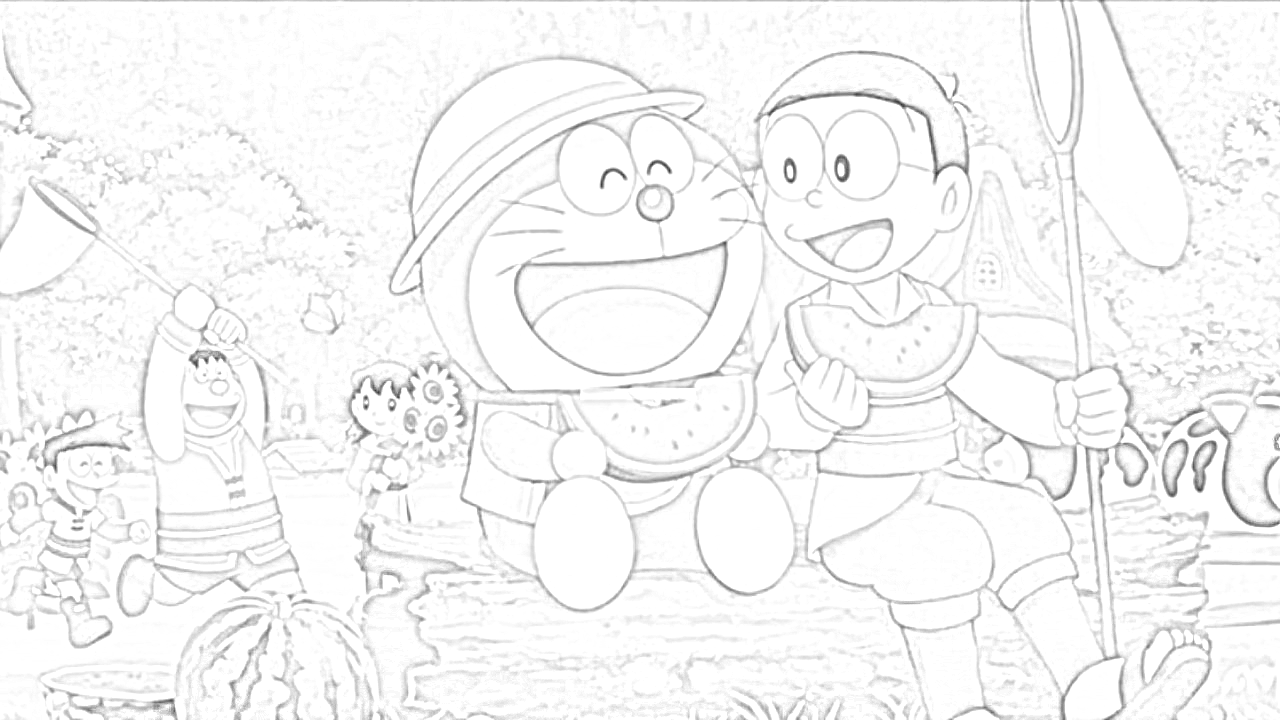

In [12]:
# Blend the grayscale image with the blurred inverted image 
sketch_image = cv2.divide(gray_image, 255 - blurred_image, scale=256)
cv2_imshow(sketch_image)

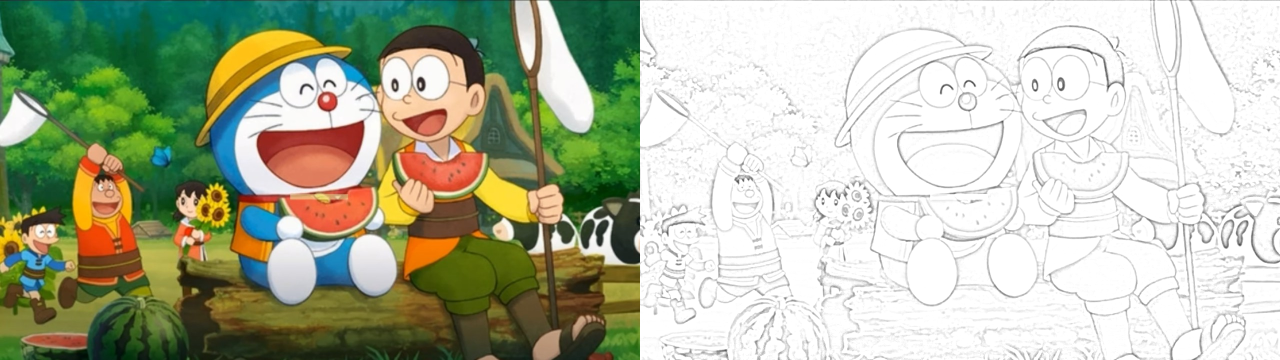

In [17]:
# Resize the original image and sketch image to display them 
small_image = cv2.resize(image, (0,0), fx=0.5, fy=0.5)
small_sketch = cv2.resize(sketch_image, (0,0), fx=0.5, fy=0.5)


sketch_color = cv2.merge((small_sketch, small_sketch, small_sketch))

# Concatenate the original image and sketch image horizontally
concatenated_image = np.concatenate((small_image, sketch_color), axis=1)

# Display the original image and pencil sketch together 
cv2_imshow(concatenated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
